In [1]:
import os

os.getcwd()

'/workspace/nas100_vol2/projects/04_PFT/src/FIRST_VISITS_entire_set/Training/test'

In [43]:
os.chdir("/workspace/nas100_vol2/projects/04_PFT/src/FIRST_VISITS_entire_set/Training")
os.getcwd()
import matplotlib.pyplot as plt
%run PFT_inference_210622.py

%matplotlib inline

import os
import pandas as pd
from tqdm import tqdm

# load internal / external validation data

In [4]:
df_internal = pd.read_excel("/workspace/nas100_vol2/projects/04_PFT/PFT_FV_entire_regression_with_preprocessing_v3/PFT_preprocessing_v3_Test_internal_210823_with_FEV1_00_FVC_01/df_internal_test_result_preprocessing_v3_FEV1_00_FVC_01_210824.xlsx",
                         index_col = 0, 
                         engine = "openpyxl")
print(df_internal.shape)
print(df_internal.keys())


_filepath = os.path.join("/workspace/nas100_vol2/projects/04_PFT/PFT_FV_entire_I3D_regression_with_preprocessing_v3/PFT_FV_entire_v3_Test_external_validation_FV2018", "df_target_test_with_result_col_rename.xlsx")

df_external = pd.read_excel(_filepath,
                       index_col = 0, 
                         engine = "openpyxl")
print(df_external.shape)
print(df_external.keys())


(2687, 75)
Index(['examID', 'ID_path', 'dir_name', 'target_path', 'check_dir_exist',
       '연구번호', 'HE0108(R5253A)검사접수번호', 'HE0109(R5253)검사접수번호', 'EXCEL',
       'PYTHON', 'sex', 'exam_date', 'age', '내원번호', 'Ht', 'Wt', 'BMI', 'AC',
       'SBP', 'DBP', 'Q0002 귀하께서는 암을 진단 받은 적이 있습니까?',
       'Q0003 진단 받은 암을 선택해 주시겠습니까? (복수 응답 가능)',
       'Q0214 폐질환, 신장/요로/전립선질환, 간/담도질환, 식도/위/대장질환 및 갑상선 질환이 있습니까?',
       'Q0229 과거력(폐,비뇨기,소화기,갑상선) 을 선택해 주시겠습니까? (복수 응답 가능)',
       'Q0012 복용/주사 중인 약을 선택해 주시겠습니까? (복수 응답 가능)',
       'Q0016 시술 혹은 수술을 선택해주시겠습니까?(복수 응답 가능)', 'Q0047 귀하는 담배를 피운적이 있습니까?',
       'Q0048 처음 흡연을 시작한 연령은 몇 세입니까?', 'Q0049 흡연을 중단한 연령은 몇 세입니까?',
       'Q0050 하루 평균 흡연량은 얼마입니까? (현재 끊으신분도 과거 하루 평균 흡연량 표시바랍니다)',
       'Q0089 숨찬 증상이 있습니까?', 'Q0211 흉부 통증이 있습니까?',
       'Q0090 상기도 및 호흡기계 증상이 있습니까?', 'R5253A 접수일자', 'R5253A 결과본문', 'R5253A 결론',
       'R5253 접수일자', 'R5253 결과본문', 'R5253 결론', 'S2001 접수일자', 'S2001 결론',
       'S2002 접수일자', 'S2002 결론', 'FVC_PRED', 'FVC_MEAS', 'FVC_%PRED',
    

# target path

In [5]:
PATH_figures = '/workspace/nas100_vol2/projects/04_PFT/src/FIRST_VISITS_entire_set/Training/test/Figures_manuscript_revision'
if not os.path.isdir(PATH_figures):
    os.mkdir(PATH_figures)
PATH_figures_internal = '/workspace/nas100_vol2/projects/04_PFT/src/FIRST_VISITS_entire_set/Training/test/Figures_manuscript_revision/internal_221004'
if not os.path.isdir(PATH_figures_internal):
    os.mkdir(PATH_figures_internal)
PATH_figures_external = '/workspace/nas100_vol2/projects/04_PFT/src/FIRST_VISITS_entire_set/Training/test/Figures_manuscript_revision/external_221004'
if not os.path.isdir(PATH_figures_external):
    os.mkdir(PATH_figures_external)

# Figure 3 , agreement Measured values

## # measured min / max

In [18]:

LIST_MEAS =  ["FVC_MEAS", "FEV1_MEAS"]
LIST_MEAS_PRED = [f"modelpredicted({_col})" for _col in list_meas]
print(LIST_MEAS, LIST_MEAS_PRED)
MEAS_MIN = min(df_internal[LIST_MEAS + LIST_MEAS_PRED].min().min(), df_external[LIST_MEAS + LIST_MEAS_PRED].min().min())
MEAS_MAX = max(df_internal[LIST_MEAS + LIST_MEAS_PRED].max().max(), df_external[LIST_MEAS + LIST_MEAS_PRED].max().max())
print(MEAS_MIN, MEAS_MAX)

['FVC_MEAS', 'FEV1_MEAS'] ['modelpredicted(FVC_MEAS)', 'modelpredicted(FEV1_MEAS)']
0.94 6.98


## # % pred min / max

In [19]:


LIST_RATIO =  ['FVC_%PRED','FEV1_%PRED', 'FEV1/FVC_MEAS']
LIST_RATIO_PRED = [f"modelpredicted({_col})" for _col in list_ratio]
print(LIST_RATIO, LIST_RATIO_PRED)
RATIO_MIN = min(df_internal[LIST_RATIO + LIST_RATIO_PRED].min().min(), df_external[LIST_RATIO + LIST_RATIO_PRED].min().min())
RATIO_MAX = max(df_internal[LIST_RATIO + LIST_RATIO_PRED].max().max(), df_external[LIST_RATIO + LIST_RATIO_PRED].max().max())
print(RATIO_MIN, RATIO_MAX)

['FVC_%PRED', 'FEV1_%PRED', 'FEV1/FVC_MEAS'] ['modelpredicted(FVC_%PRED)', 'modelpredicted(FEV1_%PRED)', 'modelpredicted(FEV1/FVC_MEAS)']
35.0 146.0


In [20]:
def get_scatter_plot(data, save_path, dpi= 300):
    import string
    alphabet_list = list(string.ascii_lowercase)

    list_target = ["FVC_MEAS","FEV1_MEAS",'FVC_%PRED','FEV1_%PRED', 'FEV1/FVC_MEAS']
    list_name   =  "FVC", "FEV1", "FVC_percent_of_pred", "FEV1_percent_of_pred", "FEV1_over_FVC"  # 저장용
    list_xlabel = "FVC", "FEV$_1$", "FVC%", "FEV$_1$%", "FEV$_1$/FVC"  # x label
    list_ylabel = "DL predicted FVC", "DL predicted FEV$_1$", "DL predicted FVC%", "DL predicted FEV$_1$%", "DL predicted FEV$_1$/FVC"
    list_unit = "(L)", "(L)", "(%)", "(%)", "(%)"
    #-----
    scatter_marker  = {"marker":".",
                      "alpha": 0.2}
    line_styles = {"linewidth": 0.5,
                  "linestyle":(0, (3,2)),
                   "color" :"k"
                  }
    #-----

    metric_font_style = {"fontsize": 20,
                         "transform": "ax.transAxes", "ha":"left"}
    bbox = dict(boxstyle="round,pad=0.5,rounding_size=0.2", 
                fc="white", 
                ec ="lightgray"
               )

    for i, _targetcol in enumerate(list_target):
        print(i, f"{alphabet_list[i]}_{list_name[i]}")
        _x = data[_targetcol]
        _y = data[f"modelpredicted({_targetcol})"]
        print(get_evaluation_metrics(_x,_y))
        _rmse, _mae, _max_abser, _median_abser, _CCC, _r2_scipy, _r2_scipy_inverse = get_evaluation_metrics(_x,_y)

        fig, ax = plt.subplots(nrows = 1, ncols = 1,figsize = (10, 10))
        label_text = f"MAE  : {_mae:,.2f}\nCCC  : {_CCC:,.2f}"
        metric_font_style = {"fontsize": 20,
                             "transform": "ax.transAxes"}
        bbox_position = (0.05, 0.88)

            
            
        # annotate 1 : agreement metric such as RMSE, MAE, and CCC
        ax.annotate(label_text, bbox_position,
                    xycoords='axes fraction',
                    **metric_font_style, 
                    bbox = bbox)
        


        ax.scatter(_x, _y, marker = "o", 
                   alpha = 0.2,
                  s = 20)
        ax.plot([0, 150], [0, 150],
             **line_styles
             )



        ax.tick_params(axis = "both",size = 10, labelsize = 18)
        ax.set_xlabel(list_xlabel[i], fontsize = 20)
        ax.set_ylabel(list_ylabel[i], fontsize = 20)


        if (i ==0) or (i==1):
            ax.set_xlim(MEAS_MIN,MEAS_MAX)
            ax.set_ylim(MEAS_MIN,MEAS_MAX)
            figure_number= 3
            
            # annotate 2: unit of each axis
            _unit = list_unit[i]
            ax.annotate(_unit,   
                    xy = (MEAS_MAX,-.05), 
                   xycoords  =("data",'axes fraction'), 
                   fontsize = 17,
                        ha = "center"
                   )
            ax.annotate(_unit,   
                    xy = (-.04, MEAS_MAX), 
                   xycoords  =('axes fraction', "data"), 
                   fontsize = 17,
                        va = "top", 
                        ha = "center"
                   )


        else:
            ax.set_xlim(RATIO_MIN, RATIO_MAX)
            ax.set_ylim(RATIO_MIN, RATIO_MAX)
            figure_number= 4
            
                        
            # annotate 2: unit of each axis
            _unit = list_unit[i]
            ax.annotate(_unit,   
                    xy = (RATIO_MAX,-.05), 
                   xycoords  =("data",'axes fraction'), 
                   fontsize = 17,
                        ha = "center"
                   )
            ax.annotate(_unit,   
                    xy = (-.05,RATIO_MAX), 
                   xycoords  =('axes fraction',"data"), 
                   fontsize = 17,
                        va = "top", 
                        ha= "center"
                   )
            
            
        plt.savefig(os.path.join(save_path, f"figure{figure_number}_scatter_{alphabet_list[i]}_{list_name[i]}_dpi{dpi}.png"), 
                    dpi = dpi, bbox_inches = "tight")
        plt.show()
        plt.close(fig)

In [21]:
def mean_diff_plot(m1, m2, sd_limit=1.96, ax=None, scatter_kwds=None,
                   mean_line_kwds=None, limit_lines_kwds=None):
    """
    Construct a Tukey/Bland-Altman Mean Difference Plot.

    Tukey's Mean Difference Plot (also known as a Bland-Altman plot) is a
    graphical method to analyze the differences between two methods of
    measurement. The mean of the measures is plotted against their difference.

    For more information see
    https://en.wikipedia.org/wiki/Bland-Altman_plot

    Parameters
    ----------
    m1 : array_like
        A 1-d array.
    m2 : array_like
        A 1-d array.
    sd_limit : float
        The limit of agreements expressed in terms of the standard deviation of
        the differences. If `md` is the mean of the differences, and `sd` is
        the standard deviation of those differences, then the limits of
        agreement that will be plotted are md +/- sd_limit * sd.
        The default of 1.96 will produce 95% confidence intervals for the means
        of the differences. If sd_limit = 0, no limits will be plotted, and
        the ylimit of the plot defaults to 3 standard deviations on either
        side of the mean.
    ax : AxesSubplot
        If `ax` is None, then a figure is created. If an axis instance is
        given, the mean difference plot is drawn on the axis.
    scatter_kwds : dict
        Options to to style the scatter plot. Accepts any keywords for the
        matplotlib Axes.scatter plotting method
    mean_line_kwds : dict
        Options to to style the scatter plot. Accepts any keywords for the
        matplotlib Axes.axhline plotting method
    limit_lines_kwds : dict
        Options to to style the scatter plot. Accepts any keywords for the
        matplotlib Axes.axhline plotting method

    Returns
    -------
    Figure
        If `ax` is None, the created figure.  Otherwise the figure to which
        `ax` is connected.

    References
    ----------
    Bland JM, Altman DG (1986). "Statistical methods for assessing agreement
    between two methods of clinical measurement"

    Examples
    --------

    Load relevant libraries.

    >>> import statsmodels.api as sm
    >>> import numpy as np
    >>> import matplotlib.pyplot as plt

    Making a mean difference plot.

    >>> # Seed the random number generator.
    >>> # This ensures that the results below are reproducible.
    >>> np.random.seed(9999)
    >>> m1 = np.random.random(20)
    >>> m2 = np.random.random(20)
    >>> f, ax = plt.subplots(1, figsize = (8,5))
    >>> sm.graphics.mean_diff_plot(m1, m2, ax = ax)
    >>> plt.show()

    .. plot:: plots/graphics-mean_diff_plot.py
    
    """
    from statsmodels.graphics import utils
    fig, ax = utils.create_mpl_ax(ax)

    if len(m1) != len(m2):
        raise ValueError('m1 does not have the same length as m2.')
    if sd_limit < 0:
        raise ValueError('sd_limit ({}) is less than 0.'.format(sd_limit))

    means = np.mean([m1, m2], axis=0)
    diffs = m1 - m2
    mean_diff = np.mean(diffs)
    std_diff = np.std(diffs, axis=0)

    scatter_kwds = scatter_kwds or {}
    if 's' not in scatter_kwds:
        scatter_kwds['s'] = 20
    mean_line_kwds = mean_line_kwds or {}
    limit_lines_kwds = limit_lines_kwds or {}
    for kwds in [mean_line_kwds, limit_lines_kwds]:
        if 'color' not in kwds:
            kwds['color'] = 'gray'
        if 'linewidth' not in kwds:
            kwds['linewidth'] = 1
    if 'linestyle' not in mean_line_kwds:
        kwds['linestyle'] = '--'
    if 'linestyle' not in limit_lines_kwds:
        kwds['linestyle'] = ':'

    ax.scatter(means, diffs, **scatter_kwds) # Plot the means against the diffs.
    ax.axhline(mean_diff, **mean_line_kwds)  # draw mean line.

    # Annotate mean line with mean difference.
    ax.annotate('mean diff:\n{}'.format(np.round(mean_diff, 2)),
                xy=(0.99, 0.5),
                horizontalalignment='right',
                verticalalignment='center',
                fontsize=18,
                xycoords='axes fraction')

    if sd_limit > 0:
        half_ylim = (1.5 * sd_limit) * std_diff
        ax.set_ylim(mean_diff - half_ylim,
                    mean_diff + half_ylim)
        limit_of_agreement = sd_limit * std_diff
        lower = mean_diff - limit_of_agreement
        upper = mean_diff + limit_of_agreement
        for j, lim in enumerate([lower, upper]):
            ax.axhline(lim, **limit_lines_kwds)
        ax.annotate(f'-{sd_limit} SD: {lower:0.2g}',
                    xy=(0.99, 0.07),
                    horizontalalignment='right',
                    verticalalignment='bottom',
                    fontsize=18,
                    xycoords='axes fraction')
        ax.annotate(f'+{sd_limit} SD: {upper:0.2g}',
                    xy=(0.99, 0.92),
                    horizontalalignment='right',
                    fontsize=18,
                    xycoords='axes fraction')

    elif sd_limit == 0:
        half_ylim = 3 * std_diff
        ax.set_ylim(mean_diff - half_ylim,
                    mean_diff + half_ylim)

    ax.set_ylabel('Difference', fontsize=15)
    ax.set_xlabel('Means', fontsize=15)
    ax.tick_params(labelsize=13)
    fig.tight_layout()
    return fig

In [22]:
def get_Bland_Altman_plot(data, save_path, dpi = 300):
    import statsmodels.api as sm
    
    import string
    alphabet_list = list(string.ascii_lowercase)

    list_target = ["FVC_MEAS", "FEV1_MEAS",'FVC_%PRED','FEV1_%PRED', 'FEV1/FVC_MEAS']
    list_name = "FVC", "FEV1", "FVC_percent_of_pred", "FEV1_percent_of_pred", "FEV1_over_FVC"  # 저장용
    list_xlabel = "FVC", "FEV$_1$", "FVC%", "FEV$_1$%", "FEV$_1$/FVC"  # x label
    list_ylabel = "DL predicted FVC", "DL predicted FEV$_1$", "DL predicted FVC%", "DL predicted FEV$_1$%", "DL predicted FEV$_1$/FVC"
    list_unit = "(L)", "(L)", "(%)", "(%)", "(%)"
    
    plt.rc('text', usetex=False)
    scatter_marker  = {"marker":"o",
                       "s":30,
                      "alpha": 0.3}
    for i, _targetcol in enumerate(list_target):
        print(f"{alphabet_list[i]}_{list_name[i]}")
        _x = data[_targetcol]
        _y = data[f"modelpredicted({_targetcol})"]
        

        ax_ylim = (_y -_x).abs().max() * 1.1
        f, ax = plt.subplots(1,figsize = (8, 5))

        sm.graphics.mean_diff_plot(_y, _x, ax= ax, 
                                  scatter_kwds = scatter_marker)
        
        #---
        ax.tick_params(axis = "both",size = 10, labelsize = 18)
       
        ax.set_xlabel(f"Means\n({list_xlabel[i]}+{list_ylabel[i]})/2", fontsize = 20)
        ax.set_ylabel(f"Differences\n{list_ylabel[i]} - {list_xlabel[i]}", fontsize = 20)
        ax.set_ylim(-ax_ylim, ax_ylim)
        
        if (i ==0) or (i==1):
#             ax.set_xlim(MEAS_MIN,MEAS_MAX)
            figure_number= 3


        else:
#             ax.set_xlim(RATIO_MIN,RATIO_MAX)
            figure_number= 4
        
        
        
        plt.savefig(os.path.join(save_path, f"figure{figure_number}_Bland-Altman_{alphabet_list[i]}_{list_name[i]}_a_diffrange.png"), 
                dpi = dpi,
                   bbox_inches = "tight")
        #------
        # xrange를 세 변수 모두 같게.........?  => 정수로 맞춰짐.
        xmin = np.round(min(_x.min(), _y.min()) * 0.9) 
        xmax = np.round(max(_x.max(), _y.max()) * 1.1)
        ax.set_xlim(xmin,xmax)
        plt.savefig(os.path.join(save_path, f"figure{figure_number}_Bland-Altman_{alphabet_list[i]}_{list_name[i]}_b_set_xscale.png"), 
                dpi = dpi,
                   bbox_inches = "tight")
        #-------


        plt.show()

## Figure 3 / Supple Figure S4 - Internal validation set

0 a_FVC
RMSE:  0.2856954335983975
MAE:  0.2226069066122557
R2_scipy:  0.8749422822963857
R2_scipy_inverse: 0.86309736565607
R2_uncentered:  0.9947988162725928
Lin Concordance correlation coefficient:  0.934683122385725

max resid:  1.5414783763885498
mean resid:  0.2226069066122557
std resid:  0.2844297650383805
median resid:  0.18340886116027777
(0.2856954335983975, 0.2226069066122557, 1.5414783763885498, 0.18340886116027777, 0.934683122385725, 0.8749422822963857, 0.86309736565607)
RMSE:  0.2856954335983975
MAE:  0.2226069066122557
R2_scipy:  0.8749422822963857
R2_scipy_inverse: 0.86309736565607
R2_uncentered:  0.9947988162725928
Lin Concordance correlation coefficient:  0.934683122385725

max resid:  1.5414783763885498
mean resid:  0.2226069066122557
std resid:  0.2844297650383805
median resid:  0.18340886116027777


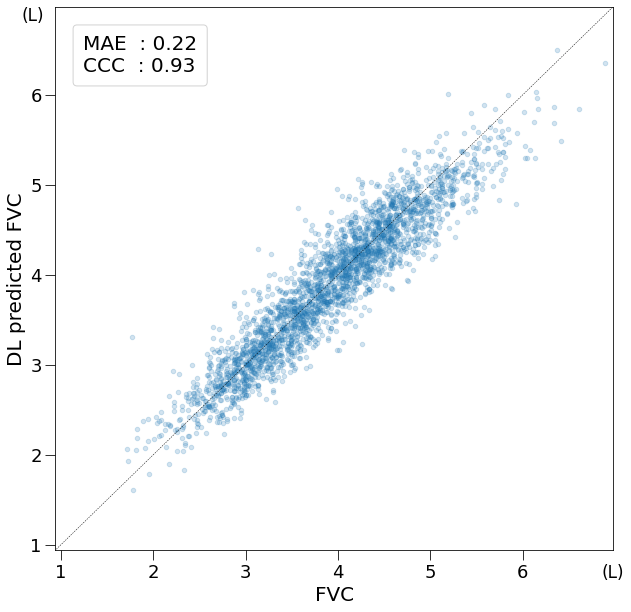

1 b_FEV1
RMSE:  0.2757227058418094
MAE:  0.21627372654388505
R2_scipy:  0.8227236684938501
R2_scipy_inverse: 0.7794305131631637
R2_uncentered:  0.9921130800623963
Lin Concordance correlation coefficient:  0.9017274429673463

max resid:  1.2024843502044682
mean resid:  0.21627372654388505
std resid:  0.2756152471229839
median resid:  0.17864957809448212
(0.2757227058418094, 0.21627372654388505, 1.2024843502044682, 0.17864957809448212, 0.9017274429673463, 0.8227236684938501, 0.7794305131631637)
RMSE:  0.2757227058418094
MAE:  0.21627372654388505
R2_scipy:  0.8227236684938501
R2_scipy_inverse: 0.7794305131631637
R2_uncentered:  0.9921130800623963
Lin Concordance correlation coefficient:  0.9017274429673463

max resid:  1.2024843502044682
mean resid:  0.21627372654388505
std resid:  0.2756152471229839
median resid:  0.17864957809448212


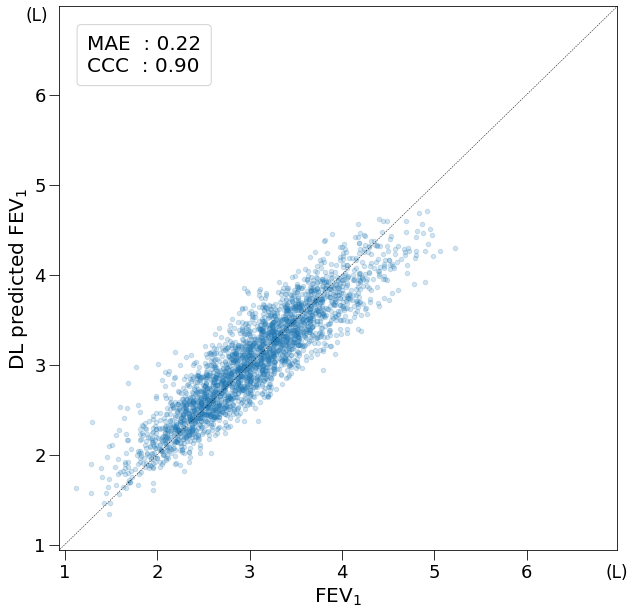

2 c_FVC_percent_of_pred
RMSE:  6.7159331446946995
MAE:  5.251193209076816
R2_scipy:  0.6102122779042627
R2_scipy_inverse: 0.5061074079861192
R2_uncentered:  0.994526986249741
Lin Concordance correlation coefficient:  0.7825687754885424

max resid:  38.623191322943185
mean resid:  5.251193209076816
std resid:  6.687141439825854
median resid:  4.352261953795988
(6.7159331446946995, 5.251193209076816, 38.623191322943185, 4.352261953795988, 0.7825687754885424, 0.6102122779042627, 0.5061074079861192)
RMSE:  6.7159331446946995
MAE:  5.251193209076816
R2_scipy:  0.6102122779042627
R2_scipy_inverse: 0.5061074079861192
R2_uncentered:  0.994526986249741
Lin Concordance correlation coefficient:  0.7825687754885424

max resid:  38.623191322943185
mean resid:  5.251193209076816
std resid:  6.687141439825854
median resid:  4.352261953795988


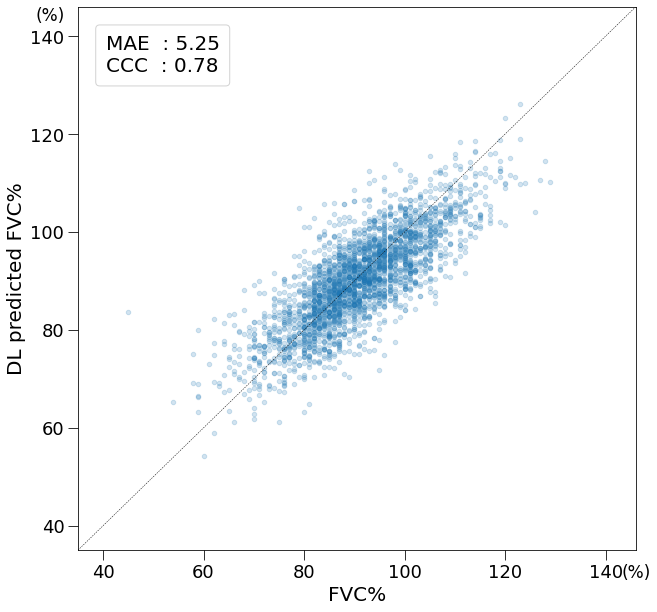

3 d_FEV1_percent_of_pred
RMSE:  8.282113841296905
MAE:  6.501391851326736
R2_scipy:  0.5065651888371518
R2_scipy_inverse: 0.28206366258057747
R2_uncentered:  0.9917971365371219
Lin Concordance correlation coefficient:  0.7078106725845156

max resid:  40.576935545238044
mean resid:  6.501391851326736
std resid:  8.271439741961274
median resid:  5.3417375511098015
(8.282113841296905, 6.501391851326736, 40.576935545238044, 5.3417375511098015, 0.7078106725845156, 0.5065651888371518, 0.28206366258057747)
RMSE:  8.282113841296905
MAE:  6.501391851326736
R2_scipy:  0.5065651888371518
R2_scipy_inverse: 0.28206366258057747
R2_uncentered:  0.9917971365371219
Lin Concordance correlation coefficient:  0.7078106725845156

max resid:  40.576935545238044
mean resid:  6.501391851326736
std resid:  8.271439741961274
median resid:  5.3417375511098015


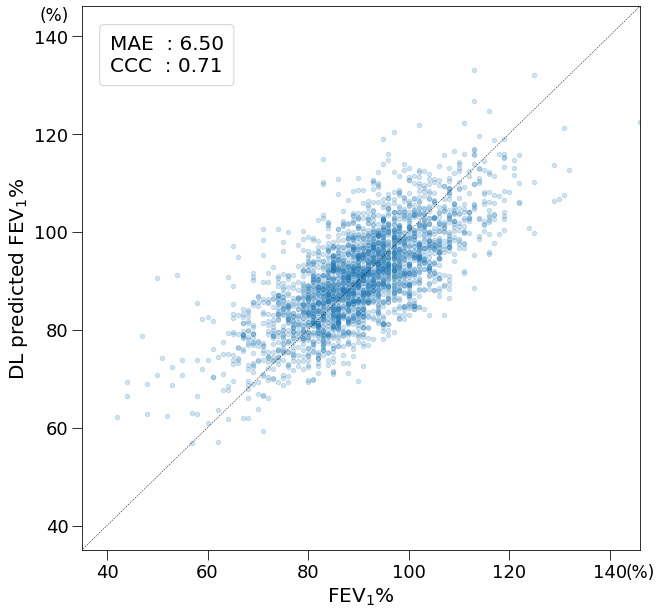

4 e_FEV1_over_FVC
RMSE:  6.084285579929646
MAE:  4.703277635578664
R2_scipy:  0.1929327908232532
R2_scipy_inverse: 0.10274920895752837
R2_uncentered:  0.9940850548568677
Lin Concordance correlation coefficient:  0.580035223807412

max resid:  25.079795613589198
mean resid:  4.703277635578664
std resid:  6.000906314851527
median resid:  3.814798241304203
(6.084285579929646, 4.703277635578664, 25.079795613589198, 3.814798241304203, 0.580035223807412, 0.1929327908232532, 0.10274920895752837)
RMSE:  6.084285579929646
MAE:  4.703277635578664
R2_scipy:  0.1929327908232532
R2_scipy_inverse: 0.10274920895752837
R2_uncentered:  0.9940850548568677
Lin Concordance correlation coefficient:  0.580035223807412

max resid:  25.079795613589198
mean resid:  4.703277635578664
std resid:  6.000906314851527
median resid:  3.814798241304203


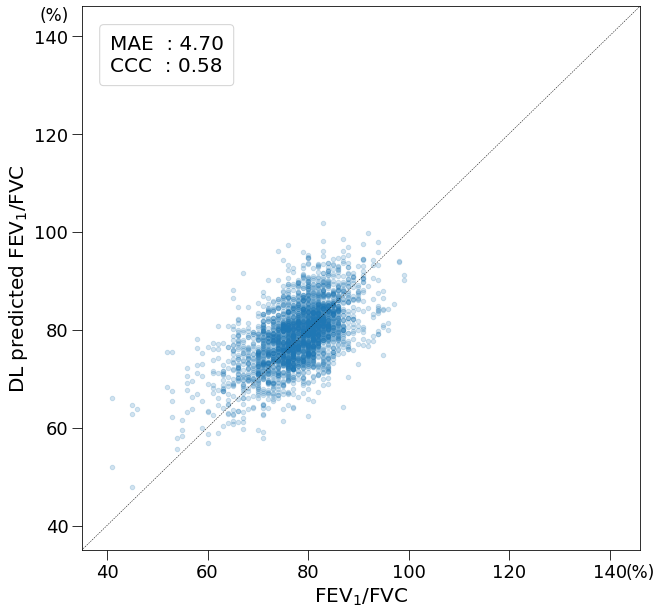

In [82]:
get_scatter_plot(df_internal,PATH_figures_internal, dpi = 1200)

a_FVC


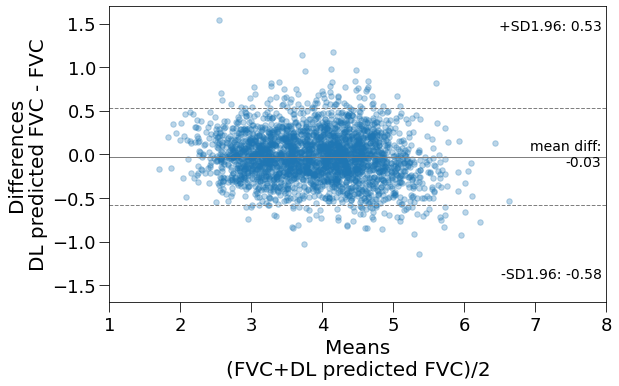

b_FEV1


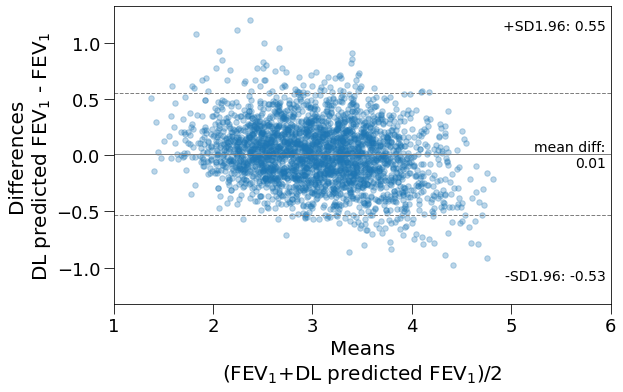

c_FVC_percent_of_pred


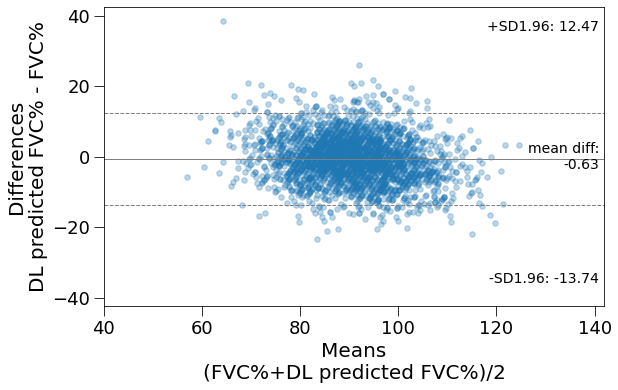

d_FEV1_percent_of_pred


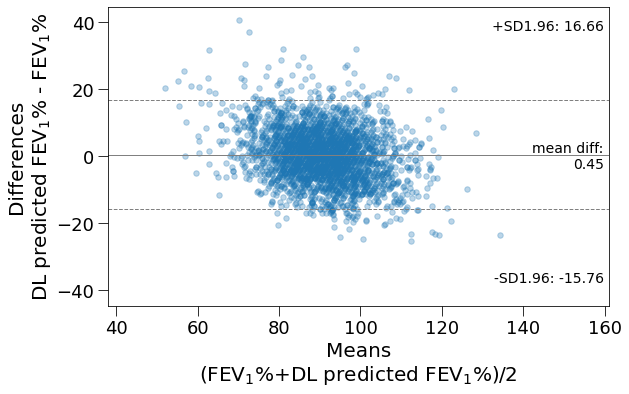

e_FEV1_over_FVC


In [ ]:
get_Bland_Altman_plot(df_internal, PATH_figures_internal, dpi = 1200)

## Figure 3 / Supple Figure S4 - external validation set

In [ ]:
get_scatter_plot(df_external,PATH_figures_external, dpi = 1200)

In [ ]:
get_Bland_Altman_plot(df_external, PATH_figures_external, dpi = 1200)

# Classificaion Performance - Supplementary Figure 2


The classification performance for risk prediction was summarized in Table 3 and confusion  matrices for three kinds of classification were shown in Supplementary Figure S2. 

In [62]:

from pytz import timezone
from datetime import datetime
from sklearn.metrics import roc_curve, plot_roc_curve, auc, precision_recall_curve, confusion_matrix
import string
from sklearn.utils import resample



def get_AUROC_AUPRC(target_PFT_value, model_PFT_value, \
                    cutoff, \
                    assigned_value_title, \
                    PATH_to_save,\
                    col_filename,\
                   plotYN =True, 
                   printYN = True,
                   dpi = 300):
    metric_font_style = {"fontsize": 11,
                         "transform": "ax.transAxes"}
    bbox = dict(boxstyle="round,pad=0.5,rounding_size=0.2", 
                fc="white", 
                ec ="lightgray"
               )
    list_title = [ "FVC (% of predicted value)", "FEV$_1$ (% of predicted value)", "FEV$_1$/FVC"]
    dict_position_ROC = {"FVC (% of predicted value)":[0.40, 0.05],
                     "FEV$_1$ (% of predicted value)":[0.38, 0.05] , 
                     "FEV$_1$/FVC":[0.68, 0.05]
                         
                    }
    dict_position_PRC = {"FVC (% of predicted value)":[0.40, 0.89],
                     "FEV$_1$ (% of predicted value)":[0.38, 0.87] , 
                     "FEV$_1$/FVC":[0.68, 0.87], 
                    }
    np_range = np.sort(model_PFT_value.unique())
    dict_metric = {"cutoff":[],
                   "acc":[],
                   "tpr":[],
                   "fpr":[],
                   "precision":[],
                   "recall":[],
                   "f1":[]
                  }
    
    np_range = np.sort(model_PFT_value.unique())
    y_true = target_PFT_value.map(lambda x: 0 if x >=cutoff else 1 ) # 이게 맞다
    for _cutoff_DL in np_range:
        y_pred = model_PFT_value.map(lambda x: 0 if x >=_cutoff_DL else 1 )

        cm = confusion_matrix(y_true, y_pred)
        TN, FP, FN, TP = cm.ravel()
        
        acc = ((TP + TN) / (TP + TN + FP +FN)) 
        sensitivity = tpr = (TP /(TP +FN)) 
        fpr =( FP / (FP + TN)) 
        specificity = 1- fpr 

        precision = (TP / (TP + FP))
        recall = sensitivity
        fscore = (2 * precision * recall) / (precision + recall)
        
        dict_metric["cutoff"].append(_cutoff_DL)
        dict_metric["acc"].append(acc)
        dict_metric["tpr"].append(tpr)
        dict_metric["fpr"].append(fpr)
        dict_metric["precision"].append(precision)
        dict_metric["recall"].append(recall)
        dict_metric["f1"].append(fscore)

    df_metric = pd.DataFrame.from_dict(dict_metric, orient = "columns")
    df_metric = df_metric[np.logical_not(np.isnan(df_metric["precision"]))]  # 버그 잡기

    ix = np.argmax(dict_metric["f1"])

    
    df_fprtpr = df_metric[["fpr", "tpr"]].sort_values(by = "fpr")
    roc_auc = auc(df_fprtpr["fpr"],df_fprtpr["tpr"])
    
    df_precisionrecall = df_metric[["precision", "recall"]].sort_values(by = "recall")
    prc_auc = auc(df_precisionrecall["recall"], df_precisionrecall["precision"])
    
    
    if printYN:
        print(assigned_value_title)
        print("AUROC: ", roc_auc)
        print("AUPRC: ", prc_auc)
        print("ix attached f1",ix)
        print('Best Threshold=%f, F-Score=%.3f, precision=%.3f, recall=%.3f' % (np_range[ix], 
                                                                                dict_metric["f1"][ix],
                                                                                dict_metric["precision"][ix], 
                                                                                dict_metric["recall"][ix]))
        print("ACC ",dict_metric["acc"][ix] )
        
    
    if plotYN:
    #--------------------------------------------------------------------
    # Receiver-Operator Characteristics
    #--------------------------------------------------------------------
        f, a = plt.subplots(nrows = 1, ncols = 1, figsize = (6,6))
        a.plot(df_fprtpr["fpr"],df_fprtpr["tpr"])
        label =  f"{assigned_value_title} < {cutoff}%\nAUROC = {roc_auc:,.2f}"

        a.annotate(label, (dict_position_ROC[assigned_value_title][0], dict_position_ROC[assigned_value_title][1]),
                        xycoords='axes fraction',
    #             transform=ax.transAxes,
                **metric_font_style, 
                bbox = bbox)
        a.plot([-1, 2], [-1, 2], linewidth = 0.5, linestyle=(0, (3,2)), color = "k")
        a.set_xlim(-0.01,1.01)
        a.set_ylim(-0.01,1.01)
        a.set_xlabel("1 - Specificity", fontsize = 15)
        a.set_ylabel("Sensitivity", fontsize = 15)
        
        a.grid(zorder = 0, alpha = 0.3)
        
        now = datetime.strftime(datetime.now(timezone('Asia/Seoul')), format = "%Y%m%d_%H%M%s")
        plt.savefig(os.path.join(PATH_to_save, f"Figure5_ROC_{col_filename}_dpi{dpi}_{now}.png"),
                   dpi = dpi,
                   bbox_inches = "tight")
        plt.show()
    #--------------------------------------------------------------------
    # Precision-Recall curve
    #--------------------------------------------------------------------

        f, a = plt.subplots(nrows = 1, ncols = 1, figsize = (6,6))



        a.plot(df_precisionrecall["recall"], df_precisionrecall["precision"])

        prevalence = (len(y_true[y_true==1]) / len(y_true))
        a.plot([0, 100], [prevalence, prevalence],  
               linewidth = 0.5, 
               linestyle=(0, (3,2)), 
               color = "k"
              )

        # axis labels
        a.set_xlabel('Recall', fontsize = 15)
        a.set_ylabel('Precision', fontsize = 15)
        # show the legend
        label =  f"{assigned_value_title} < {cutoff}%\nAUPRC = {prc_auc:,.2f}"
        

        a.annotate(label, (dict_position_PRC[assigned_value_title][0], dict_position_PRC[assigned_value_title][1]),
                    xycoords='axes fraction',
    #             transform=ax.transAxes,
                **metric_font_style, 
                bbox = bbox)

        a.set_xlim(-0.01,1.01)
        a.set_ylim(-0.01,1.01)
        
        a.grid(zorder = 0, alpha = 0.3)
        
        # show the plot
        now = datetime.strftime(datetime.now(timezone('Asia/Seoul')), format = "%Y%m%d_%H%M%S")
        plt.savefig(os.path.join(PATH_to_save,  f"Supple_FigureS5_PRC_{col_filename}_dpi{dpi}_{now}.png"),
                   dpi = dpi,
                   bbox_inches = "tight")
        plt.show()
    return roc_auc, prc_auc



## Figure 5 ROC 


## Supple Figure S5 PRC

In [ ]:
list_target = ['FVC_%PRED','FEV1_%PRED', 'FEV1/FVC_MEAS']
list_title = [ "FVC (% of predicted value)", "FEV$_1$ (% of predicted value)", "FEV$_1$/FVC"]
list_name = "FVC_percent_of_pred", "FEV1_percent_of_pred", "FEV1_over_FVC"  
list_cutoff = [80, 80, 70]



    
dict_internal = {} 
for i, _targetcol in enumerate(list_target):
    print("==" * 40)
    print("internal validation set", _targetcol)
    print("==" * 40)
    _cutoff = list_cutoff[i]

    y_true = df_internal[_targetcol]
    y_pred = df_internal[f"modelpredicted({_targetcol})"]
    auroc, auprc = get_AUROC_AUPRC(y_true, y_pred, _cutoff, list_title[i],PATH_figures_internal, list_name[i], dpi = 1200 )
#     break
    
    dict_internal[_targetcol] = {"AUROC":auroc,
                                 "AUPRC":auprc}
    
print("internal test set in development set")
display(pd.DataFrame.from_dict(dict_internal, orient = "index"))



dict_external = {}
for i, _targetcol in enumerate(list_target):
    print("==" * 40)
    print("External validation set", _targetcol)
    print("==" * 40)
    _cutoff = list_cutoff[i]

    y_true = df_external[_targetcol]
    y_pred = df_external[f"modelpredicted({_targetcol})"]
    auroc, auprc = get_AUROC_AUPRC(y_true, y_pred, _cutoff, list_title[i],PATH_figures_external, list_name[i], dpi = 1200)
    
#     break
    dict_external[_targetcol] = {"AUROC":auroc,
                                 "AUPRC":auprc}
    
print("temporally-independent test set")
display(pd.DataFrame.from_dict(dict_external, orient = "index"))

In [39]:
display(pd.DataFrame.from_dict(dict_internal, orient = "index"))

,AUROC,AUPRC
FVC_%PRED,0.910867,0.622582
FEV1_%PRED,0.869768,0.589309
FEV1/FVC_MEAS,0.842213,0.445592


In [40]:
display(pd.DataFrame.from_dict(dict_external, orient = "index"))

,AUROC,AUPRC
FVC_%PRED,0.904334,0.684542
FEV1_%PRED,0.864104,0.613844
FEV1/FVC_MEAS,0.849452,0.403881


## Table 3 bootstrapping CI for AUROC and AUPRC


### 1) internal test set

In [ ]:
N_BOOTSTRAP = 2000
CI_percent = 95

list_target = ['FVC_%PRED','FEV1_%PRED', 'FEV1/FVC_MEAS']
list_title = [ "FVC (% of predicted value)", "FEV$_1$ (% of predicted value)", "FEV$_1$/FVC"]
list_name = "FVC_percent_of_pred", "FEV1_percent_of_pred", "FEV1_over_FVC" 
list_cutoff = [80, 80, 70]

dict_CI = dict()
for i, _targetcol in enumerate(list_target):
    if _targetcol in dict_CI.keys():
        continue
    else:
        pass
    print(i, _targetcol)

    print("==" * 40)
    print("internal test set", _targetcol)
    print("==" * 40)
    _cutoff = list_cutoff[i]
    
    dict_boot_sampling = dict()
    for _boot in tqdm(np.arange(0, 2000)):
        df_resample_internal = df_internal.sample(frac = 1, 
                                                 replace = True )




        y_true = df_resample_internal[_targetcol]
        y_pred = df_resample_internal[f"modelpredicted({_targetcol})"]
        auroc, auprc = get_AUROC_AUPRC(y_true, y_pred, _cutoff, 
                                       list_title[i],
                                       PATH_figures_internal, 
                                       list_name[i],
                                      printYN = False, 
                                      plotYN = False
                                      )
        dict_boot_sampling[_boot] = dict()
        dict_boot_sampling[_boot]["AUROC"] = auroc
        dict_boot_sampling[_boot]["AUPRC"] = auprc
        
    df_boot_sampling = pd.DataFrame.from_dict(dict_boot_sampling,
                                             orient = "index")   
    dict_CI[_targetcol] = dict()
    alpha = 100-CI_percent 
    p_lower = (alpha/2)/100 
    p_upper = (100- alpha/2)/100
    for _metric in ["AUROC", "AUPRC"]:

        dict_CI[_targetcol][_metric]  = df_boot_sampling[_metric].quantile([p_lower, p_upper]).values.round(3)
    print(dict_CI)
    now = datetime.strftime(datetime.now(timezone('Asia/Seoul')), format = "%Y%m%d_%H%M%S")
    print(now)
    print("internal test set", _targetcol, "\n\t================>finished")


pd.DataFrame.from_dict(dict_CI, orient = "index")



### 2) temporally independent test set

In [ ]:
N_BOOTSTRAP = 2000
CI_percent = 95
df_target = df_external

list_target = ['FVC_%PRED','FEV1_%PRED', 'FEV1/FVC_MEAS']
list_title = [ "FVC (% of predicted value)", "FEV$_1$ (% of predicted value)", "FEV$_1$/FVC"]
list_name = "FVC_percent_of_pred", "FEV1_percent_of_pred", "FEV1_over_FVC"  
list_cutoff = [80, 80, 70]

dict_CI = dict()
for i, _targetcol in enumerate(list_target):
    print("==" * 40)
    print("external test set", _targetcol)
    now = datetime.strftime(datetime.now(timezone('Asia/Seoul')), format = "%Y%m%d_%H%M%S")
    print(now)
    print("==" * 40)
    _cutoff = list_cutoff[i]
    
    dict_boot_sampling = dict()
    for _boot in tqdm(np.arange(0, 2000)):
        df_resample = df_target.sample(frac = 1, 
                                                 replace = True )




        y_true = df_resample[_targetcol]
        y_pred = df_resample[f"modelpredicted({_targetcol})"]
        auroc, auprc = get_AUROC_AUPRC(y_true, y_pred, _cutoff, 
                                       list_title[i],
                                       PATH_figures_external, 
                                       list_name[i],
                                      printYN = False, 
                                      plotYN = False
                                      )
        dict_boot_sampling[_boot] = dict()
        dict_boot_sampling[_boot]["AUROC"] = auroc
        dict_boot_sampling[_boot]["AUPRC"] = auprc
        
    df_boot_sampling = pd.DataFrame.from_dict(dict_boot_sampling,
                                             orient = "index")   
    dict_CI[_targetcol] = dict()
    alpha = 100-CI_percent 
    p_lower = (alpha/2)/100 
    p_upper = (100- alpha/2)/100
    for _metric in ["AUROC", "AUPRC"]:

        dict_CI[_targetcol][_metric] =dict_CI[_targetcol][_metric] = df_boot_sampling[_metric].quantile([p_lower, p_upper]).values.round(3)
    print(dict_CI[_targetcol])
    now = datetime.strftime(datetime.now(timezone('Asia/Seoul')), format = "%Y%m%d_%H%M%S")
    print(now)
    print("external test set", _targetcol, "\n\t================>finished")


pd.DataFrame.from_dict(dict_CI, orient = "index")

## Figure 4 - Confusion Matrix 

In [76]:
import itertools
def plot_confusion_matrix(cm, 
                          classes_true,classes_pred,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues, 
                         filename = "Confusion_matrix" ):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    cm_number = cm.copy()
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=0)
        print("Normalized confusion matrix")
    else:
        #print('Confusion matrix, without normalization')
        print('Confusion matrix')

#     extent = [1.5,-0.5,-0.5,1.5,]

    plt.imshow(cm, 
               origin = "lower", 
#                extent = extent,
               interpolation='nearest', 
               cmap=cmap)
    plt.gca().invert_xaxis()
    plt.title(title, fontsize='x-large')
    plt.colorbar()
    tick_marks = np.arange(len(classes_true))
    plt.xticks(tick_marks, classes_true, fontsize='large')
    plt.yticks(tick_marks, 
               classes_pred, 
               fontsize='large', 
              )

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        cm_text =f"{cm[i, j]:,.2f}\n({cm_number[i,j]})"
#         print(i, j, cm_text)
        plt.text(j, i, cm_text,
                 horizontalalignment="center",
                 va = "center",
                 color="white" if cm[i, j] > thresh else "black", size='xx-large')

    plt.tight_layout()
    plt.xlabel('Ground truth', fontsize='large')
    plt.ylabel('Predicted values', fontsize='large')
    plt.savefig(filename, bbox_inches = "tight", dpi = 300)
    plt.show()
    
    
def plot_confusion_matrix_in_percent_1(cm, 
                          classes_true,classes_pred,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues, 
                         filename = "Confusion_matrix_in_percent_decimal2",
                          dpi = 600):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    cm_number = cm.copy()
#     cm_percent = cm * 100
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=0)
#         [:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        #print('Confusion matrix, without normalization')
        print('Confusion matrix')

#     extent = [1.5,-0.5,-0.5,1.5,]
    cm_percent = cm * 100
    

    plt.imshow(cm_percent, 
               origin = "lower", 
#                extent = extent,
               interpolation='nearest', 
               cmap=cmap, 
              vmin = 0, 
              vmax = 100)
    plt.gca().invert_xaxis()
#     plt.title(title, fontsize='x-large')
    plt.colorbar()
    tick_marks = np.arange(len(classes_true))
    plt.xticks(tick_marks, classes_true, fontsize='large')
    plt.yticks(tick_marks, 
               classes_pred, 
               fontsize='large', 
#                rotation=90
              )

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        cm_text =f"{cm_percent[i, j]:,.1f}%\n({cm_number[i,j]})"
#         print(i, j, cm_text)
        plt.text(j, i, cm_text,
                 horizontalalignment="center",
                 va = "center",
                 color="white" if cm[i, j] > thresh else "black", size='xx-large')

    plt.tight_layout()
    plt.xlabel(title, fontsize='x-large')
    plt.ylabel(f"DL predicted {title}", fontsize='x-large')
    filename = filename.replace(".png", f"_dpi{dpi}.png")
    plt.savefig(filename, bbox_inches = "tight", dpi = dpi)
    plt.show()    
    



def get_confusion_matrix(target_PFT_value, model_PFT_value, cutoff, assigned_title, _cmap, save_filename, dpi = 600):
    y_true = target_PFT_value.map(lambda x: 0 if x >=cutoff else 1 )
    y_pred =  model_PFT_value
    y_pred_binary = y_pred.map(lambda x: 0 if x >=cutoff else 1 )
  


    cm = confusion_matrix(y_true, y_pred_binary)
    
    _filename = save_filename.replace(".png", "_v2_percent_decimal1_wo_title.png")
    plot_confusion_matrix_in_percent_1(cm.T, 
                                  [f"Over{np.round(cutoff, 2)}", f"Under {np.round(cutoff, 2)}"],
                                  [f"Over{cutoff}", f"Under{cutoff}"],
                                  normalize=True,
                                  title=assigned_title,
                                  cmap=_cmap, 
                                 filename = _filename,
                                      dpi = dpi)   
    

    tn, fp, fn,  tp = cm.ravel()
    n = len(y_true)
    accuracy = (tp +tn) / (tn + fp + fn + tp)
    sensitivity = tp / (tp +fn)
    
    specificity = tn / (tn +fp)
    ppv = tp / (tp  + fp)
    npv = tn / (tn + fn)
    fpr = fp / (fp + tn)
    fnr = fn / (fn + tp)

        
    dict_metric = {"accuracy":np.round(accuracy, 4), 
                   "sensitivity": np.round(sensitivity, 4),
                   "specificity": np.round(specificity, 4),
                  "sen_numerator": tp  ,
                   "sen_denominator":(tp +fn) , 
                   "spec_numerator": tn  ,
                   "spec_denominator":(tn +fp) ,
                  "TN": tn,
                  "FP": fp, 
                  "FN": fn, 
                  "TP": tp}    

    display(pd.DataFrame(dict_metric, index = [_targetcol]))

    return dict_metric

## 1) internal test set

In [ ]:
list_target = ['FVC_%PRED','FEV1_%PRED', 'FEV1/FVC_MEAS']
list_title = [ "FVC %", "FEV$_1$%", "FEV$_1$/FVC"]
list_name = "FVC_percent_of_pred", "FEV1_percent_of_pred", "FEV1_over_FVC"  # for file save


dict_metric_merge = dict()
for i, _targetcol in enumerate(list_target):
    print("==" * 40)
    print("internal validation dataset  // in development set", _targetcol)
    print("==" * 40)
    _cutoff = list_cutoff[i]

    y_true = df_internal[_targetcol]
    y_pred = df_internal[f"modelpredicted({_targetcol})"]

#     cm = confusion_matrix(y_true_bi, y_pred_bi)
    
    filename = os.path.join(PATH_figures_internal, f"Figure4_Confusion_matrix_{i}_{list_name[i]}_cutoff{_cutoff}_modified.png")
    _dict_metric = get_confusion_matrix(y_true, y_pred, 
                                        _cutoff, 
                                        list_title[i], 
                                        plt.cm.Blues, 
                                        filename,
                                       dpi = 1200)
    dict_metric_merge[_targetcol] = _dict_metric
    
df_metric_merge = pd.DataFrame.from_dict(dict_metric_merge, orient = "index")
print("==" * 40)
print("internal test set  // in development set  --> results merged")
print("==" * 40)
display(df_metric_merge)

display((df_metric_merge * 100).round(1))

## 2) temporally-independent test set

In [ ]:
import matplotlib
matplotlib.rcParams['text.usetex'] = False
import itertools
from sklearn.metrics import confusion_matrix
list_target = ['FVC_%PRED','FEV1_%PRED', 'FEV1/FVC_MEAS']
list_title = [ "FVC%", "FEV$_1$%", "FEV$_1$/FVC (%)"]
list_name = "FVC_percent_of_pred", "FEV1_percent_of_pred", "FEV1_over_FVC"  # for saving
list_cutoff = [80, 80, 70]


dict_metric_merge = dict()
for i, _targetcol in enumerate(list_target):
    print("==" * 40)
    print("temporally-independent testing dataset", _targetcol)
    print("==" * 40)
    _cutoff = list_cutoff[i]

    y_true = df_external[_targetcol]
    y_pred = df_external[f"modelpredicted({_targetcol})"]


    
    filename = os.path.join(PATH_figures_external, f"Figure4_Confusion_matrix_{i}_{list_name[i]}_cutoff{_cutoff}_modified.png")
    _dict_metric = get_confusion_matrix(y_true, y_pred, _cutoff, list_title[i], plt.cm.Blues, filename, dpi = 1200)
    dict_metric_merge[_targetcol] = _dict_metric
    
df_metric_merge = pd.DataFrame.from_dict(dict_metric_merge, orient = "index")
print("==" * 40)
print("temporally-independent testing dataset  --> results merged")
print("==" * 40)
display(df_metric_merge)

display((df_metric_merge * 100).round(1))
display((df_metric_merge * 100).round())

## Supple Table 6-8, Figure S6- risk prediction with adjusted cutoff found in internal validation set  - Figure S6

In [270]:
from datetime import datetime
from pytz import timezone

now = datetime.strftime(datetime.now(timezone('Asia/Seoul')), "%Y%m%d%H%M%S")
print(now)

20220524165907


In [72]:
def get_classification_result(y_true, y_pred_value, adjusted_cutoff):
    from sklearn.metrics import confusion_matrix

    y_pred = y_pred_value.map(lambda x: 0 if x >=adjusted_cutoff else 1 )
    
    TN, FP, FN, TP = confusion_matrix(y_true, y_pred).ravel()
    acc = (TP + TN) / (TP + TN + FP +FN)
    sensitivity = TP /(TP +FN)
    specificity = TN / (TN + FP)
    
    ppv = TP / (TP +FP)
    npv = TN / (TN + FN)    

    list_tmp = [adjusted_cutoff]+[acc, sensitivity, specificity, ppv, npv, TN, FP, FN, TP]
    return list_tmp





def get_adjusted_metric(internal_data, external_data, col_true, col_pred, cutoff, dpi = 600):
    from sklearn.metrics import confusion_matrix
    from datetime import datetime
    now = now = datetime.strftime(datetime.now(timezone('Asia/Seoul')), "%Y%m%d%H%M%S")

    dict_result = dict()
    
    target_PFT_value = internal_data[col_true]
    model_PFT_value = internal_data[col_pred]

    y_true = target_PFT_value.map(lambda x: 0 if x >=cutoff else 1 ) # 이게 맞다
    
    list_acc = []
    list_fpr = []
    list_tpr = []
    list_spec = []
    
    list_precision = []
    list_recall = []
    
    list_f1 = []
    np_range = np.sort(model_PFT_value.unique())
    np_range = np_range[(np_range <np.percentile(np_range, 99.9)) & (np_range >np.percentile(np_range, 0.1))]
    for _cutoff_DL in np_range:
        y_pred = model_PFT_value.map(lambda x: 0 if x >=_cutoff_DL else 1 )

        cm = confusion_matrix(y_true, y_pred)
        TN, FP, FN, TP = cm.ravel()

        acc = (TP + TN) / (TP + TN + FP +FN)
        sensitivity = tpr = TP /(TP +FN)
        fpr = FP / (FP + TN)
        specificity = 1- fpr

        precision = TP / (TP + FP)
        recall = sensitivity
        fscore = (2 * precision * recall) / (precision + recall)
        
        list_acc.append(acc)

        list_tpr.append(tpr)
        list_fpr.append(fpr)
        
        list_spec.append(specificity)
        

        list_precision.append(precision)
        list_recall.append(recall)
        list_f1.append(fscore)


    list_tmp= get_classification_result(y_true, model_PFT_value, cutoff)
    dict_result[f"by same cutoff{cutoff}"] = list_tmp
        
    col_filename = col_true.replace("%", "percent_")
    col_filename = col_filename.replace("/", "_over_")    
        
        
    ix_f1 = np.argmax(list_f1)
    list_tmp= get_classification_result(y_true, model_PFT_value, np_range[ix_f1])
    dict_result["by f1_score"] = list_tmp
    
    ix_youden = np.argmax(np.array(list_tpr) + np.array(list_spec))
    list_tmp= get_classification_result(y_true, model_PFT_value, np_range[ix_youden])
    dict_result["by youden"] = list_tmp
    
    
    
    
    return_df = pd.DataFrame.from_dict(dict_result, orient = "index", 
                                      columns = ["cutoff", "acc", "sen", "spec", "ppv", "npv", "TN", "FP", "FN", "TP"])

    
    
    fig, ax = get_metrics_curve_211122(target_PFT_value,model_PFT_value, _cutoff )
    ax.vlines(x = np_range[ix_f1], ymin = 0, ymax = 100, linewidth = 0.7, linestyle = "solid", color = "r", label = "maximizing f1-score")
    ax.vlines(x = np_range[ix_youden], ymin = 0, ymax = 100, linewidth = 0.7, 
              linestyle = "solid", color = "blue", label = "Youden Index\nmaximizing (sen. + spec.)")
    plt.legend(loc = (1.2, 0.31), 
               fontsize = 15,
               markerscale = 1.4,
               labelspacing = 1)
#     plt.title(f"internal {col_true}")
    plt.savefig(os.path.join(PATH_figures_internal, f"Figure_S6_internal_{col_filename}_dpi{dpi}_{now}.png"),
               bbox_inches = "tight",
               dpi = dpi)
    plt.show()
    
    
    
    
    # external set
    dict_result = dict()
    target_PFT_value = external_data[col_true]
    model_PFT_value = external_data[col_pred]
    fig, ax = get_metrics_curve_211122(target_PFT_value,model_PFT_value, _cutoff )
    ax.vlines(x = np_range[ix_f1], ymin = 0, ymax = 100, linewidth = 0.7, linestyle = "solid", color = "r", label = "maximizing f1-score")
    ax.vlines(x = np_range[ix_youden], ymin = 0, ymax = 100, linewidth = 0.7, linestyle = "solid", color = "blue", label = "Youden Index\nmaximizing (sen. + spec.)")
#     plt.title(f"external {col_true}")
    plt.legend(loc = (1.2, 0.31), 
               fontsize = 15,
               markerscale = 1.4,
               labelspacing = 1)
    plt.savefig(os.path.join(PATH_figures_external, f"Figure_S6_external_{col_filename}_dpi{dpi}_{now}.png"),
               bbox_inches = "tight", 
               dpi = dpi)
    plt.show()
    
    
    y_true = target_PFT_value.map(lambda x: 0 if x >=cutoff else 1 ) # 이게 맞다
    
    list_tmp= get_classification_result(y_true, model_PFT_value, cutoff)
    dict_result[f"by same cutoff{cutoff}"] = list_tmp
    
    list_tmp= get_classification_result(y_true, model_PFT_value, np_range[ix_f1])
    dict_result["by f1_score"] = list_tmp
    
    list_tmp= get_classification_result(y_true, model_PFT_value, np_range[ix_youden])
    dict_result["by youden"] = list_tmp
    
    return_df_external = pd.DataFrame.from_dict(dict_result, orient = "index", 
                                      columns = ["cutoff", "acc", "sen", "spec", "ppv", "npv", "TN", "FP", "FN", "TP"])
    
    
    return_df_merged = return_df.merge(return_df_external, on = "cutoff",
                                       left_index = True,
                                       suffixes =("_internal", "_external") )
    
    return return_df_merged

In [73]:
def get_metrics_curve_211122(target_PFT_value, model_PFT_value,_cutoff, \
                                          distance_1 = 25, distance_2 = 20, distance_3 = 15):
    """
    distance_1: ppv, npv
    distance_2: sensitivity, specificity
    distance_3: accuracy
    """
    
    
    from sklearn.metrics import f1_score
    list_colors = ["#bfb45c", "#fbf48e","#5f5825","#9d9860",  "#dcdcb4", "#54502c" ]
    y_true = target_PFT_value.map(lambda x: 0 if x >=_cutoff else 1 )
    y_pred =  model_PFT_value
    target_positive = len(y_true[y_true==1]) / len(y_true) * 100
    
    list_range = np.sort(model_PFT_value[(model_PFT_value >=_cutoff-10)& (model_PFT_value <=_cutoff+10)].unique() )
    print("range list length", len(list_range))
    
    list_index = []
    list_ppv = []
    list_accuracy = []
    list_sensitivity = []
    list_specificity = []
    list_npv = []
#     list_f1 = []
#     list_f1_cal =[]
    position_marker = {"x":[], "y":[]}
    if_crossed = 0
    for _index_cutoff, _varying_cutoff in enumerate(list_range):
        y_pred_binary =  y_pred.map(lambda x: 0 if x >=_varying_cutoff else 1 )
        cm = confusion_matrix(y_true,y_pred_binary)
        tn, fp, fn,  tp = cm.ravel() 
        
        accuracy = (tp +tn) / (tn +fp + fn +tp) * 100
        sensitivity = tp / (tp + fn)  * 100 # sensitivity
        specificity = (tn) / (tn +fp) * 100
        ppv = tp / (tp + fp) * 100 # ppv
        npv = tn / (tn + fn ) * 100
        
        weight_on_recall = 0.5
        F1_cal = 2 * (ppv * weight_on_recall*sensitivity) / (ppv + weight_on_recall*sensitivity)
        f1 = f1_score(y_true,y_pred_binary, average = "binary")
#         print(ppv, sensitivity)
        if if_crossed==0:
            if ppv <=sensitivity:
                position_marker["x"].append(list_index[-1])
                position_marker["y"].append(list_ppv[-1])
                position_marker["x"].append(_varying_cutoff)
                position_marker["y"].append(ppv)
                if_crossed = 1
        list_accuracy.append(accuracy)      
        list_sensitivity.append(sensitivity) #recall = sensitivity
        list_specificity.append(specificity)
        list_ppv.append(ppv) #ppv
        list_npv.append(npv)
#         list_f1.append(f1)
#         list_f1_cal.append(F1_cal)
        list_index.append(_varying_cutoff)
    
    print("two point", position_marker)
    position_marker["x"]  = np.mean(position_marker["x"] )
    position_marker["y"]  = np.mean(position_marker["y"] ) 
    print("--> mean", position_marker)
    f1, a = plt.subplots(nrows = 1, ncols = 1, figsize = (6,6), sharey = "row")    

    
    a.plot(list_index, list_sensitivity, label = "sensitivity(recall)", color = list_colors[0], linewidth = 2)
    a.plot(list_index, list_specificity, label = "specificity", color = list_colors[1], linewidth = 2)
    
    
    a.plot(list_index, list_ppv, label = "ppv(precision)", color = list_colors[2], linewidth = 2,
          linestyle = (0, (2.5,1))
          )
    a.plot(list_index, list_npv, label = "npv", color = list_colors[3], linewidth = 2,
           linestyle =(0, (2.5, 1))
          )  
    a.plot(list_index, list_accuracy, label = "accuracy", color = list_colors[4], linewidth = 2,
           linestyle =(0, (1.5, 1))
          )   
    a.plot(list_index, [target_positive] * len(list_index), 
              color = "gray", 
              linestyle = "dashed", 
              linewidth = 1, 
#               label =f"positive ratio among total validation set:{np.round(target_positive)}"
          )
    _x = list_range[1]
    _y = target_positive + 1
    _y_s =np.round(target_positive, 1) 
    a.text(_x, _y,f"prevalence ratio among total validation set:{_y_s}%")
    
    
    #-------
    a.scatter(position_marker["x"], position_marker["y"], marker = "x",
             color = "r", 
             s = 10, 
             linewidth = 10)
    list_x = [list_index[0],position_marker["x"] ]
    a.plot([list_index[0],position_marker["x"] ],[position_marker["y"]]* len(list_x), 
             linestyle = "dotted", 
             linewidth = 1, 
             color = "k")
    _x = list_index[0]
    _y = position_marker["y"]
    _y_s = np.round(_y, 1)
    print(_x, _y, _y_s)
    a.text(list_index[0], position_marker["y"], 
              f"borderline ppv/sen.value\n for balancing : {_y_s}")
    a.set_xlabel("adjusted cut-offs for predicted values(by model)", fontsize = 13)
    
#----------- text
    for _label, _label_value in zip([ "ppv", "npv"],\
                                   [ list_ppv, list_npv]):
        _x = list_range[-distance_1]
        plt.text(_x, _label_value[-distance_1], _label, fontsize = 13)
    
    
    for _label, _label_value in zip(["sensitivity", "specificity"],\
                                   [list_sensitivity, list_specificity]):
        _x = list_range[-distance_2]
        plt.text(_x, _label_value[-distance_2], _label, fontsize = 13)
        
    _x = list_range[-distance_3]
    _y = list_accuracy[-distance_3]
    plt.text(_x, _y, "accuracy", fontsize = 13)
# ----------- text
    a.grid(linewidth = 0.5, linestyle = "dotted", color = "gray")
    
    list_tick = np.arange(_cutoff-10, _cutoff +11, 5)
    a.set_xticks(list_tick)
    
#     a.legend(loc = (1.2, 0.64), fontsize = 15) 




    return f1, a

--------------------------------------------------------------------------------
FVC_%PRED
--------------------------------------------------------------------------------
range list length 1255
two point {'x': [78.85747717558947, 78.85885837904212], 'y': [58.05471124620061, 58.18181818181818]}
--> mean {'x': 78.8581677773158, 'y': 58.1182647140094}
70.02169625800954 58.1182647140094 58.1


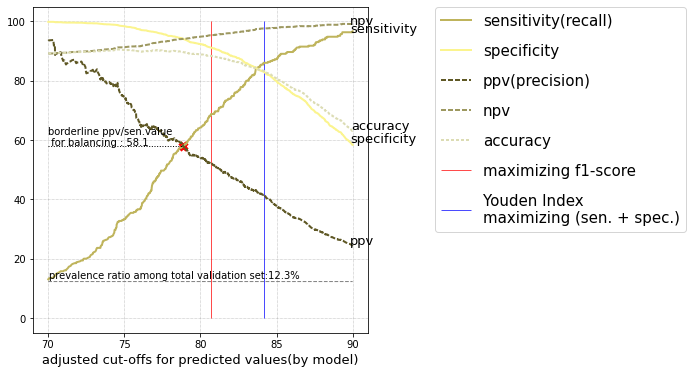

range list length 1295
two point {'x': [80.32925574334112, 80.3449697661818], 'y': [63.01020408163265, 62.849872773536894]}
--> mean {'x': 80.33711275476146, 'y': 62.930038427584776}
70.00165078246478 62.930038427584776 62.9


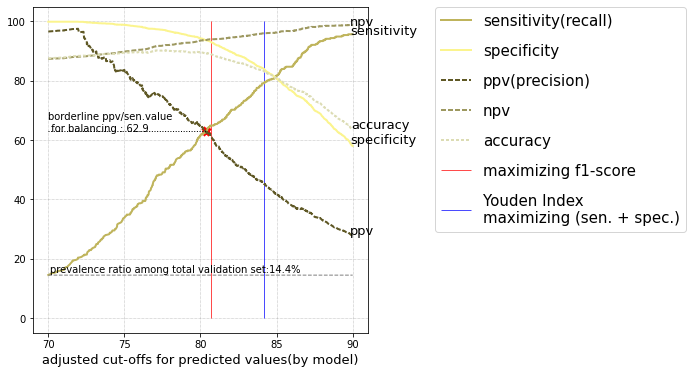

,cutoff,acc_internal,sen_internal,spec_internal,ppv_internal,npv_internal,TN_internal,FP_internal,FN_internal,TP_internal,acc_external,sen_external,spec_external,ppv_external,npv_external,TN_external,FP_external,FN_external,TP_external
by same cutoff80,80.0000,0.8887,0.6424,0.9232,0.5394,0.9486,2176,181,118,212,0.8956,0.6158,0.9428,0.6453,0.9356,2194,133,151,242
by f1_score,80.6999,0.8843,0.6879,0.9118,0.5218,0.9543,2149,208,103,227,0.8890,0.6489,0.9295,0.6086,0.9400,2163,164,138,255
by youden,84.1442,0.8340,0.8606,0.8303,0.4152,0.9770,1957,400,46,284,0.8335,0.7913,0.8406,0.4560,0.9598,1956,371,82,311


--------------------------------------------------------------------------------
FEV1_%PRED
--------------------------------------------------------------------------------
range list length 1214
two point {'x': [81.24793707991445, 81.25181551332827], 'y': [53.960396039603964, 54.074074074074076]}
--> mean {'x': 81.24987629662135, 'y': 54.01723505683902}
70.10133011536028 54.01723505683902 54.0


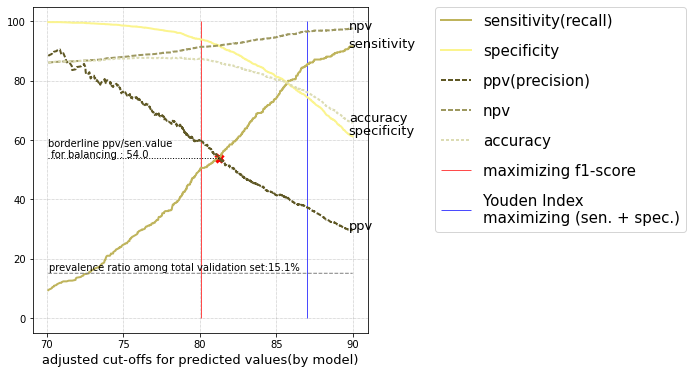

range list length 1208
two point {'x': [82.09888404014552, 82.10175435874008], 'y': [57.17255717255717, 57.05394190871369]}
--> mean {'x': 82.1003191994428, 'y': 57.11324954063543}
70.00587960725191 57.11324954063543 57.1


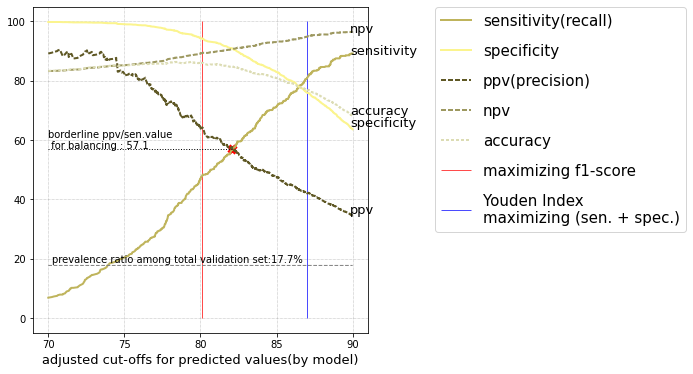

,cutoff,acc_internal,sen_internal,spec_internal,ppv_internal,npv_internal,TN_internal,FP_internal,FN_internal,TP_internal,acc_external,sen_external,spec_external,ppv_external,npv_external,TN_external,FP_external,FN_external,TP_external
by same cutoff80,80.0000,0.8738,0.4988,0.9404,0.5976,0.9136,2146,136,203,202,0.8592,0.4689,0.9433,0.6402,0.8918,2111,127,256,226
by f1_score,80.0852,0.8742,0.5062,0.9395,0.5977,0.9147,2144,138,200,205,0.8603,0.4772,0.9428,0.6425,0.8933,2110,128,252,230
by youden,87.0238,0.7622,0.8568,0.7454,0.3739,0.9670,1701,581,58,347,0.7688,0.8133,0.7592,0.4211,0.9497,1699,539,90,392


--------------------------------------------------------------------------------
FEV1/FVC_MEAS
--------------------------------------------------------------------------------
range list length 1529
two point {'x': [70.81447752243268, 70.83208801033336], 'y': [45.66929133858268, 45.88235294117647]}
--> mean {'x': 70.82328276638302, 'y': 45.77582213987958}
60.30854265677975 45.77582213987958 45.8


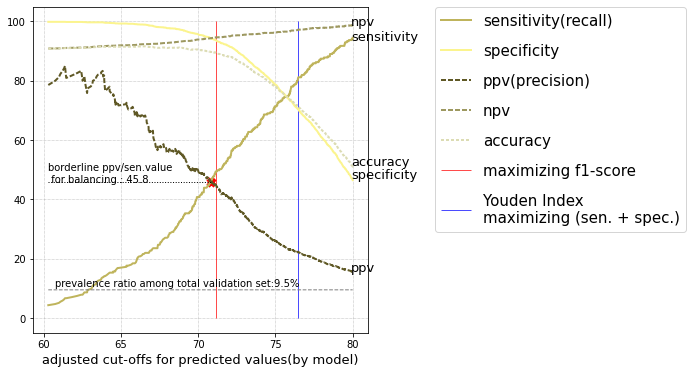

range list length 1462
two point {'x': [70.84947089691437, 70.85199542975647], 'y': [44.6215139442231, 44.44444444444444]}
--> mean {'x': 70.85073316333542, 'y': 44.53297919433378}
60.05661889847084 44.53297919433378 44.5


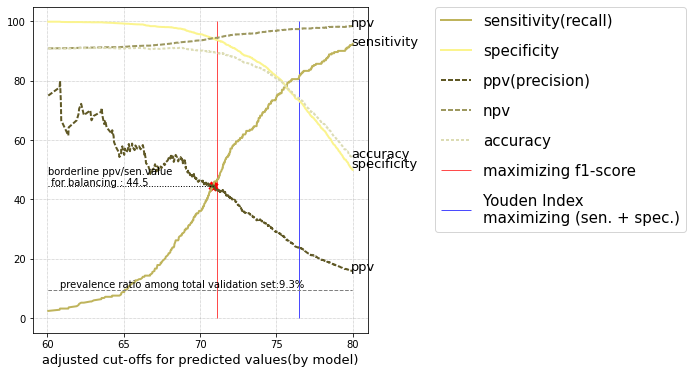

,cutoff,acc_internal,sen_internal,spec_internal,ppv_internal,npv_internal,TN_internal,FP_internal,FN_internal,TP_internal,acc_external,sen_external,spec_external,ppv_external,npv_external,TN_external,FP_external,FN_external,TP_external
by same cutoff70,70.0000,0.9047,0.4078,0.9568,0.4976,0.9391,2327,105,151,104,0.9018,0.3611,0.9571,0.4619,0.9362,2362,106,161,91
by f1_score,71.1304,0.8958,0.4941,0.9379,0.4549,0.9465,2281,151,129,126,0.8934,0.4683,0.9368,0.4307,0.9452,2312,156,134,118
by youden,76.4768,0.7149,0.8118,0.7048,0.2238,0.9728,1714,718,48,207,0.7408,0.8095,0.7338,0.2369,0.9742,1811,657,48,204


In [75]:
list_df = [df_internal, df_external]
list_dflabel = "Internal", "External"
#-------------------------------------
list_TRUE  = 'FVC_%PRED', 'FEV1_%PRED',  'FEV1/FVC_MEAS'
list_PRED = 'modelpredicted(FVC_%PRED)', 'modelpredicted(FEV1_%PRED)',  'modelpredicted(FEV1/FVC_MEAS)'
list_cutoff = 80, 80, 70
list_title = "FVC(% pred.)","FEV$_1$(% pred.)", 'FEV$_1$/FVC'

for _truecol, _predcol, _cutoff, _title in zip(list_TRUE, list_PRED, list_cutoff,list_title):
    print("--" * 40)
    print(_truecol)
    print("--" * 40)

    df_result_merged= get_adjusted_metric(df_internal, df_external, _truecol, _predcol, _cutoff, dpi = 1200)
    _truecol = _truecol.replace("%", "percent_")
    _truecol = _truecol.replace("/", "_over_")
    df_result_merged.to_excel(os.path.join(PATH_figures, f"df_metric_comparing_cutoff_{_truecol}.xlsx"))
    display(df_result_merged.round(4))
